In [1]:
import geopandas as gpd


In [2]:
from pyproj import CRS
import matplotlib.pyplot as plt

# Filepaths
grid_fp = "data/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "data/dataE5/roads.shp"
metro_fp = "data/dataE5/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [3]:
import glob
filepaths = glob.glob(r'data_travel_time//TravelTimes_to*')

In [4]:
import pandas as pd
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
for each_filepath in filepaths:
    content = pd.read_csv(each_filepath,usecols=["from_id","pt_r_t"],sep = ';')
    mall_name = each_filepath.split("_")[-1].split(".")[0]
    content.columns = ["from_id","pt_r_t_"+mall_name]
    grid = grid.merge(content,on="from_id",how="inner")

In [5]:
import numpy as np
grid = grid.replace(-1, np.nan)
grid = grid.dropna()

In [6]:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [7]:
# Create a new column for minimum travel time values 
malls = ["pt_r_t_Jumbo","pt_r_t_Dixi", "pt_r_t_Myyrmanni",  "pt_r_t_Itis",  "pt_r_t_Forum" , "pt_r_t_IsoOmena", "pt_r_t_Ruoholahti"]
grid['min_t'] = grid[malls].min(axis=1)

# Create a new column for the closest shopping center id values
grid['dominant_service'] = grid[malls].idxmin(axis=1)

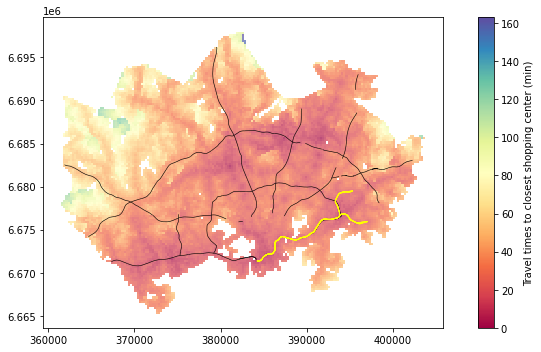

In [8]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(10,5))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="min_t", linewidth=0.03, cmap= "Spectral", k=10, alpha=.7,legend=True, legend_kwds={'label': "Travel times to closest shopping center (min)"})

                       
# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="black", linewidth=.6)

# Add metro on top of the previous map
metro.plot(ax=ax, color="yellow", linewidth= .9)

# Remove the empty white-space around the axes
plt.tight_layout()



In [9]:
import contextily as ctx
%matplotlib inline

data = grid.to_crs(epsg=3857)
roads = roads.to_crs(epsg=3857)
metro = metro.to_crs(epsg=3857)
print(data.crs)

epsg:3857


In [10]:
credits = "Travel time data by Digital Geography Lab, Map Data © OpenStreetMap contributors"

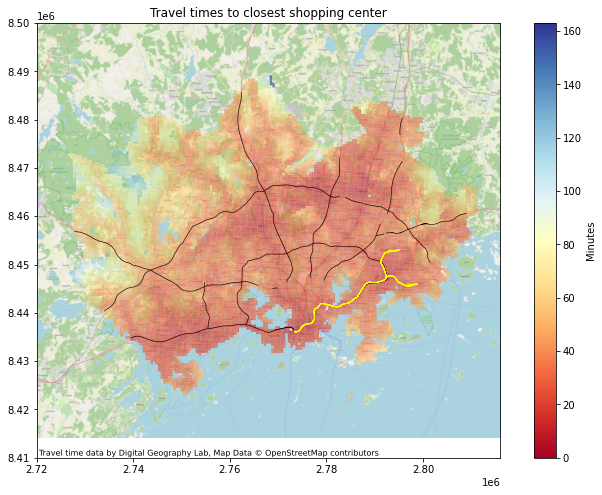

In [13]:

fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='min_t', cmap='RdYlBu', linewidth=0, k=9, alpha=0.6,legend=True, legend_kwds={'label': "Minutes"})
roads.plot(ax=ax, color="black", linewidth=.6 )
metro.plot(ax=ax, color="yellow", linewidth= .9)



# Add basemap with `OSM_A` style using zoom level of 11 
# Modify the attribution 
# ctx.add_basemap(ax, zoom=15, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik)

ctx.add_basemap(ax, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik)

# Crop the figure
ax.set_xlim(2720000, 2816000)
ax.set_ylim(8410000, 8500000)
ax.set_title("Travel times to closest shopping center")
# Save the figure as png file with resolution of 300 dpi
outfp = "docs/static_map.png"
plt.savefig(outfp, dpi=300)